Name: Aishwarya Gopal
Machine Learning Homework 1

Part 1 - Data Creation 

In [19]:
import numpy as np
import pandas as pd

def generate_dataset(n):
    np.random.seed(65846468)
    # creating 4 variables where X1 & X2 - normal distribution, X3 - uniform, X4 - non linear(not addition)
    X1 = np.random.normal(loc=10, scale=2, size=n)  
    X2 = np.random.normal(loc=10, scale=5, size=n)  
    X3 = np.random.uniform(low=9, high=18, size=n)  
    X4 = 2*X1 + 3*X2 * X3  
    df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})
    
    return df
#creating the dateset   
df = generate_dataset(100)
df

,X1,X2,X3,X4
0,9.754801,12.794056,13.605500,541.718174
1,10.585038,13.677079,14.456458,614.336436
2,13.587536,6.195254,16.871741,340.749240
3,11.396436,-2.710334,12.271875,-76.989776
4,12.392193,22.566130,17.901980,1236.719634
...,...,...,...,...
95,11.705041,2.324003,17.616131,146.229890
96,10.793118,9.505491,10.628684,324.678834
97,12.467484,14.910880,11.579973,542.937719
98,12.595121,7.811838,15.985393,399.816168


Part 2 - Data Visualisation

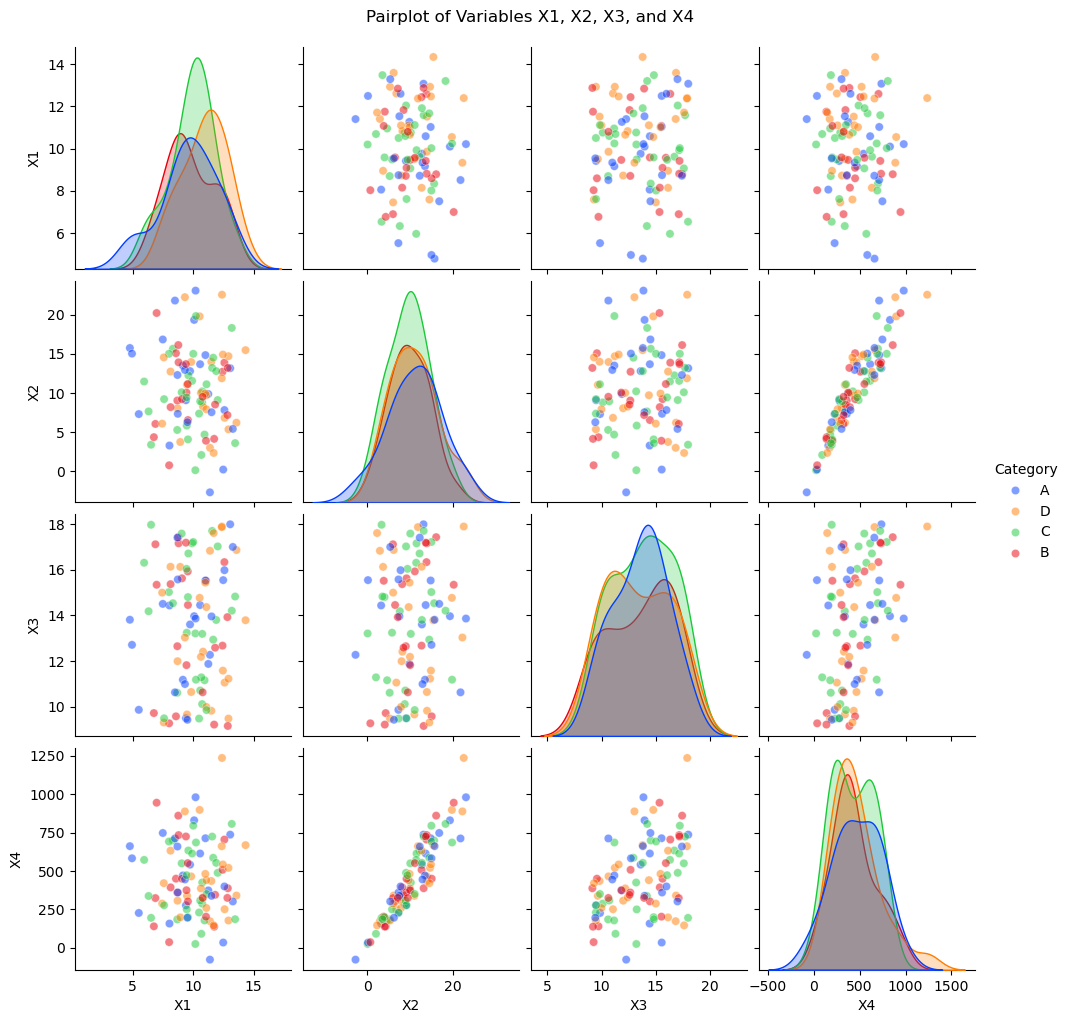

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#creating a pairplot(scatter plot 4*4) to visualize relationships between the variables
def scatterplot_matrix(df):
    sns.set_palette("bright")
    df['Category'] = np.random.choice(['A', 'B', 'C','D'], size=len(df))
    sns.pairplot(df, diag_kind='kde', hue='Category', plot_kws={'alpha': 0.5})
    plt.suptitle('Pairplot of Variables X1, X2, X3, and X4', y=1.02)
    plt.show()

#Cannot add different colors to each plot as there is no categorical columns - so created a set of dummy categorical variables
scatterplot_matrix(df)



Part 3 = summary statistics (describing the data)

In [13]:
from scipy import stats

#describing the data
def describe_data(df):
    description = {
        'Mean': df.mean(),
        'Median': df.median(),
        'Mode': df.mode().iloc[0],
        'Standard Deviation': df.std(),
        'Range': df.max() - df.min()
    }
    description_df = pd.DataFrame(description)
    return description_df

description = describe_data(df)
description

,Mean,Median,Mode,Standard Deviation,Range
X1,10.078117,10.142325,4.783501,2.044599,9.555076
X2,10.393070,9.963895,-2.710334,5.341524,25.797410
X3,13.615443,13.895787,9.150516,2.741268,8.849290
X4,447.760081,410.451007,-76.989776,243.386333,1313.709410


Part 4 - Data Split

In [18]:
from sklearn.model_selection import train_test_split

def split_dataset(df, target_variable, train, val_size, test):
    # Splitting the data
    X = df.drop(columns=[target_variable])
    y = df[target_variable]
    
    # split into training and temp (validation + test) - train is 60 rows, temp is 40 rows split into val & test
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train, random_state=65846468)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test / (test + val_size), random_state=65846468)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Splitting the data
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(df, train=0.6, val_size=0.2, test=0.2, target_variable='X4')


In [ ]:
Part 5 - Build your first model  

Validation MSE: 2868.2439
Test MSE: 1070.1762


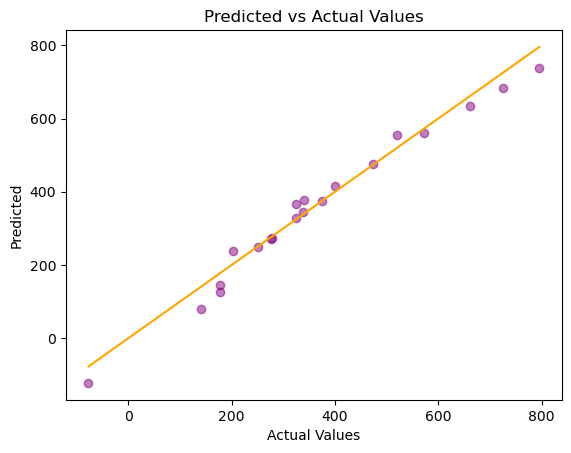

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def build_and_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test):
    
    # train,validate & test the model and implementing linear regression
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f"Validation MSE: {val_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    
    #Plot the predicted values vs actual values for the test set using a scatter plot.
    plt.scatter(y_test, y_test_pred, color='purple', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual Values')
    plt.show()

#Build your first model
build_and_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test)


